1. Examine the Data
2. Test for stationarity
2.1 If the data is non-stationary, take the difference.
2.2 Repeat this process until you get the stationary data.
3. Train Test Split
4. Grid search for order P
5. Apply the arima
6. Forecast on new data.
7. If necessary, invert the earlier transformation.

1. Import libraries and examine the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/nifty50-since26jun2009.csv')

In [ ]:
df

,Date,Previous Close,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,26-Jun-2009,4241.85,4243.95,4383.75,4243.95,4375.50,284570041,10065.52
1,29-Jun-2009,4375.50,4375.40,4439.95,4350.90,4390.95,293321334,9591.85
2,30-Jun-2009,4390.95,4391.50,4426.75,4267.35,4291.10,336647021,9901.53
3,01-Jul-2009,4291.10,4292.30,4362.30,4249.70,4340.90,289982752,8654.14
4,02-Jul-2009,4340.90,4373.50,4383.65,4288.75,4348.85,259079398,9730.33
...,...,...,...,...,...,...,...,...
3101,27-Dec-2021,17003.75,16937.75,17112.05,16833.20,17086.25,144777457,12567.03
3102,28-Dec-2021,17086.25,17177.60,17250.25,17161.15,17233.25,176026100,14553.76
3103,29-Dec-2021,17233.25,17220.10,17285.95,17176.65,17213.60,161679423,14320.79
3104,30-Dec-2021,17213.60,17201.45,17264.05,17146.35,17203.95,320831676,21929.19


In [ ]:
df.head()

,Date,Previous Close,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,26-Jun-2009,4241.85,4243.95,4383.75,4243.95,4375.50,284570041,10065.52
1,29-Jun-2009,4375.50,4375.40,4439.95,4350.90,4390.95,293321334,9591.85
2,30-Jun-2009,4390.95,4391.50,4426.75,4267.35,4291.10,336647021,9901.53
3,01-Jul-2009,4291.10,4292.30,4362.30,4249.70,4340.90,289982752,8654.14
4,02-Jul-2009,4340.90,4373.50,4383.65,4288.75,4348.85,259079398,9730.33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3106 entries, 0 to 3105
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               3106 non-null   object 
 1   Previous Close     3106 non-null   float64
 2   Open               3106 non-null   float64
 3   High               3106 non-null   float64
 4   Low                3106 non-null   float64
 5   Close              3106 non-null   float64
 6   Shares Traded      3106 non-null   int64  
 7   Turnover (Rs. Cr)  3106 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 194.2+ KB


In [ ]:
df.describe()

,Previous Close,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
count,3106.000000,3106.000000,3106.000000,3106.000000,3106.000000,3.106000e+03,3106.000000
mean,8555.784031,8566.733628,8611.576433,8507.144720,8560.005602,2.659925e+08,12535.281011
std,3208.702334,3216.599150,3225.304642,3197.112962,3211.649088,1.897765e+08,9463.642006
min,3974.050000,3974.100000,4003.400000,3918.750000,3974.050000,6.555703e+06,297.890000
25%,5699.150000,5705.637500,5733.687500,5669.562500,5699.800000,1.488662e+08,6416.745000
50%,8144.950000,8154.350000,8196.000000,8100.975000,8149.600000,1.944874e+08,8493.825000
75%,10703.712500,10719.737500,10761.737500,10645.012500,10705.512500,3.026561e+08,15438.415000
max,18477.050000,18602.350000,18604.450000,18445.300000,18477.050000,1.811564e+09,78522.930000


In [ ]:
df.dtypes

Date                  object
Previous Close       float64
Open                 float64
High                 float64
Low                  float64
Close                float64
Shares Traded          int64
Turnover (Rs. Cr)    float64
dtype: object

In [ ]:
df.isnull().sum()

Date                 0
Previous Close       0
Open                 0
High                 0
Low                  0
Close                0
Shares Traded        0
Turnover (Rs. Cr)    0
dtype: int64

In [ ]:
df.shape

(3106, 8)

In [ ]:
df.index

RangeIndex(start=0, stop=3106, step=1)

In [ ]:
#Import datetime library and use 'datetime' function
#Convert to timeseries
#ts = df['Date']
#ts.head(10)

0    26-Jun-2009
1    29-Jun-2009
2    30-Jun-2009
3    01-Jul-2009
4    02-Jul-2009
5    03-Jul-2009
6    06-Jul-2009
7    07-Jul-2009
8    08-Jul-2009
9    09-Jul-2009
Name: Date, dtype: object

In [ ]:
#Convert to date format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%Y')
df.head()

,Date,Previous Close,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,2009-06-26,4241.85,4243.95,4383.75,4243.95,4375.50,284570041,10065.52
1,2009-06-29,4375.50,4375.40,4439.95,4350.90,4390.95,293321334,9591.85
2,2009-06-30,4390.95,4391.50,4426.75,4267.35,4291.10,336647021,9901.53
3,2009-07-01,4291.10,4292.30,4362.30,4249.70,4340.90,289982752,8654.14
4,2009-07-02,4340.90,4373.50,4383.65,4288.75,4348.85,259079398,9730.33


In [ ]:
df['Year'] = df['Date'].dt.year

Text(0.5, 1.0, 'Stock Price of Nifty 50')

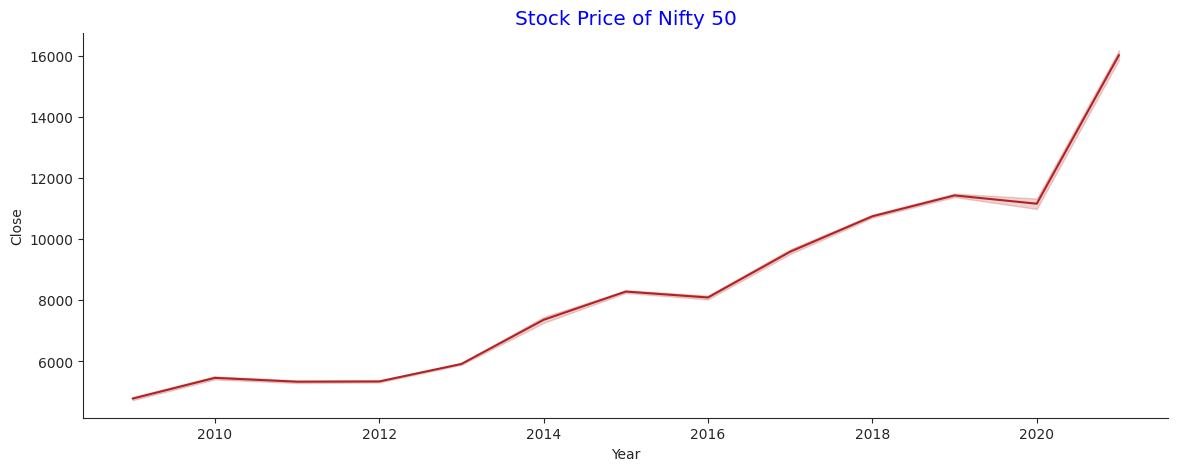

In [80]:

import seaborn as sns
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=df,x='Year',y='Close',color='firebrick')
sns.despine()
plt.title("Stock Price of Nifty 50",size='x-large',color='blue')






*   Trend of variable is non stationary for the entire DataFrame and let us perform the augmented Dickey-Fuller test.

In [45]:
#STATIONARITY CHECK
#Ho: Closing stock price is non-Stationary
#H1: Closing stock price is stationary
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = pd.Series(timeseries).rolling(window=12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = pd.Series(timeseries).rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

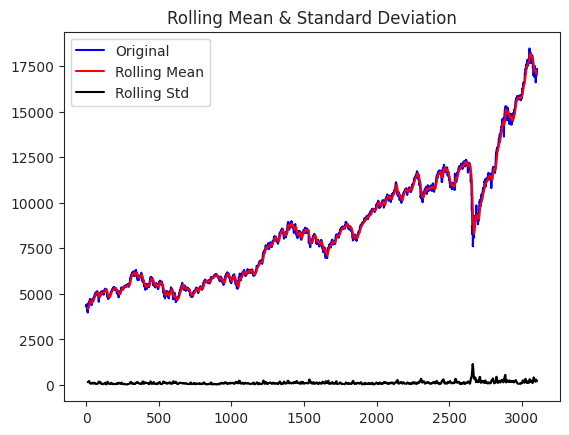

Results of Dickey-Fuller Test:
Test Statistic                    0.719345
p-value                           0.990216
#Lags Used                       15.000000
Number of Observations Used    3090.000000
Critical Value (1%)              -3.432468
Critical Value (5%)              -2.862476
Critical Value (10%)             -2.567268
dtype: float64


In [ ]:
test_stationarity(df['Close'])

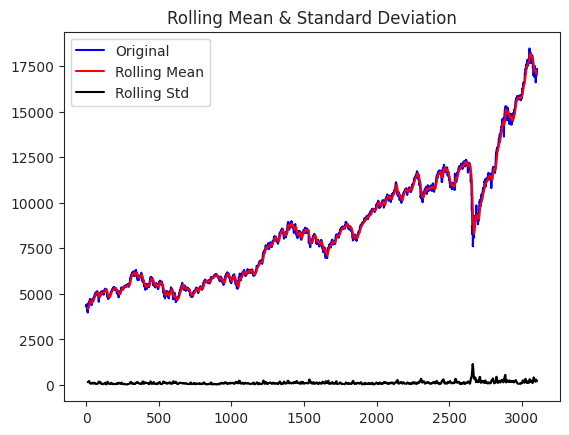

Results of Dickey-Fuller Test:
Test Statistic                    0.719345
p-value                           0.990216
#Lags Used                       15.000000
Number of Observations Used    3090.000000
Critical Value (1%)              -3.432468
Critical Value (5%)              -2.862476
Critical Value (10%)             -2.567268
dtype: float64


In [46]:
test_stationarity(df['Close'])

Let us perform the following transformation to make the data stationary

1.   Log Transformation
2.   Differencing
3.   Double Log
4.   Double Differencing
5.   Log + Differencing


After your forecasting is done, always do the inverse transformation

In [48]:
ts=df['Close']
ts_log = np.log(ts)

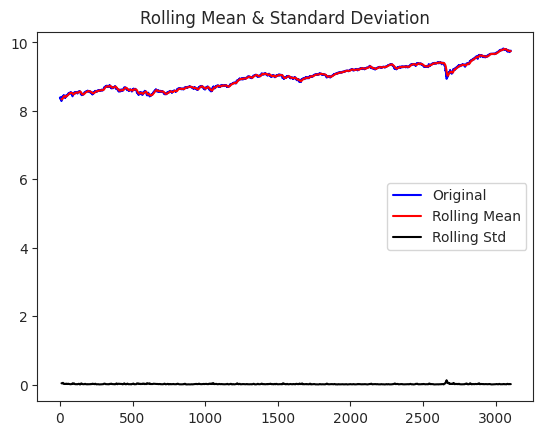

Results of Dickey-Fuller Test:
Test Statistic                   -0.584088
p-value                           0.874537
#Lags Used                       12.000000
Number of Observations Used    3093.000000
Critical Value (1%)              -3.432466
Critical Value (5%)              -2.862475
Critical Value (10%)             -2.567268
dtype: float64


In [49]:
test_stationarity(ts_log)

In [50]:
ts_doublelog = np.log(ts_log)

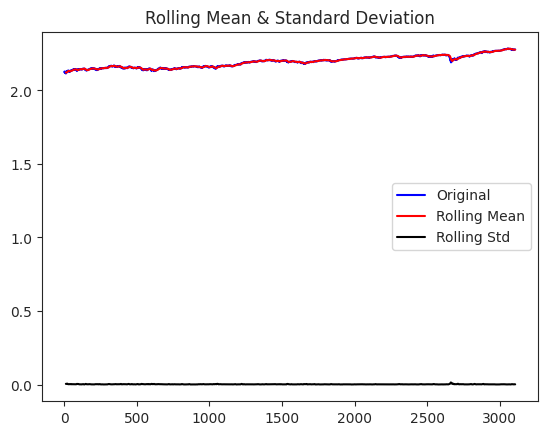

Results of Dickey-Fuller Test:
Test Statistic                   -0.726069
p-value                           0.839881
#Lags Used                       12.000000
Number of Observations Used    3093.000000
Critical Value (1%)              -3.432466
Critical Value (5%)              -2.862475
Critical Value (10%)             -2.567268
dtype: float64


In [51]:
test_stationarity(ts_doublelog)

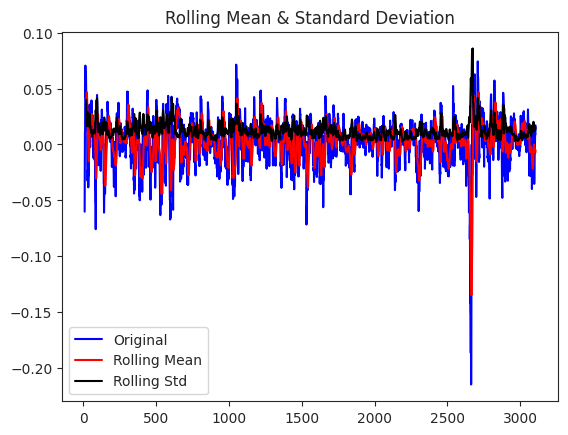

Results of Dickey-Fuller Test:
Test Statistic                -1.244558e+01
p-value                        3.671042e-23
#Lags Used                     1.200000e+01
Number of Observations Used    3.082000e+03
Critical Value (1%)           -3.432474e+00
Critical Value (5%)           -2.862478e+00
Critical Value (10%)          -2.567269e+00
dtype: float64


In [53]:
#Smoothing
moving_avg = pd.Series(ts_log).rolling(window=12).mean()
ts_log_moving_avg_diff = ts_log - moving_avg
#TEST STATIONARITY AGAINimport numpy as np

# Check for missing values
if ts_log_moving_avg_diff.isna().sum() > 0:
    # Handle missing values by filling or removing them
    ts_log_moving_avg_diff = ts_log_moving_avg_diff.fillna(method='ffill')  # Forward-fill missing values

# Check for infinite values
if not np.isfinite(ts_log_moving_avg_diff).all():
    # Handle infinite values by replacing or removing them
    ts_log_moving_avg_diff = ts_log_moving_avg_diff.replace([np.inf, -np.inf], np.nan)
    ts_log_moving_avg_diff = ts_log_moving_avg_diff.dropna()

# Call the test_stationarity() function with the cleaned time series data
test_stationarity(ts_log_moving_avg_diff)


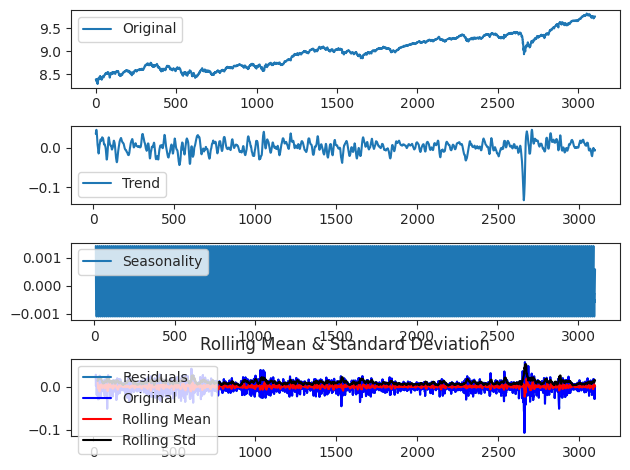

Results of Dickey-Fuller Test:
Test Statistic                  -19.299598
p-value                           0.000000
#Lags Used                       29.000000
Number of Observations Used    3053.000000
Critical Value (1%)              -3.432494
Critical Value (5%)              -2.862487
Critical Value (10%)             -2.567274
dtype: float64


In [56]:
#DECOMPOSITION
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming you have the time series data in ts_log_moving_avg_diff
period = 12  # Specify the period of seasonality

# Perform seasonal decomposition
decomposition = seasonal_decompose(ts_log_moving_avg_diff, period=period)

# Access the decomposed components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [57]:
#FINAL FORECASTING
from statsmodels.tsa.arima_model import ARIMA

In [58]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_moving_avg_diff, nlags=20)
lag_pacf = pacf(ts_log_moving_avg_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

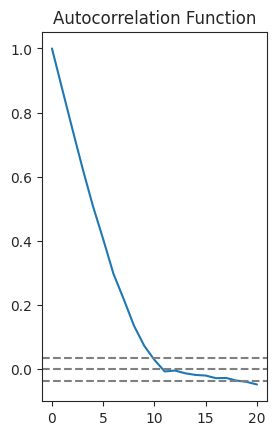

In [60]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

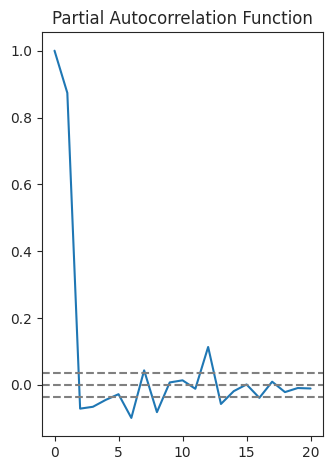

In [61]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_moving_avg_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [62]:
ts_values=ts_log.values

X = ts_values
size = int(len(X) * 0.667)
train, test = X[0:size], X[size:len(X)]


In [64]:
#AR Model
#training will be 66%, test will be 33% as per our model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from numpy.linalg import LinAlgError
import warnings
warnings.filterwarnings("ignore")

In [65]:
history = [x for x in train]
predictions = list()
#test.reset_index()
for t in range(len(test)):
    try:
        model = ARIMA(history, order=(4,1,2))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
    except (ValueError, LinAlgError):
        pass
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
rmse = mean_squared_error(test, predictions)**0.5
print('Test MSE: %.3f' % rmse)


from math import sqrt
rms = sqrt(mean_squared_error(test, predictions))

predicted=9.241785, expected=9.246060
predicted=9.246075, expected=9.243320
predicted=9.243157, expected=9.253448
predicted=9.253991, expected=9.251847
predicted=9.251792, expected=9.254596
predicted=9.254545, expected=9.254529
predicted=9.254446, expected=9.244756
predicted=9.244119, expected=9.240205
predicted=9.239871, expected=9.240768
predicted=9.241034, expected=9.242009
predicted=9.242321, expected=9.232586
predicted=9.232053, expected=9.228828
predicted=9.228541, expected=9.222076
predicted=9.221870, expected=9.231588
predicted=9.232360, expected=9.238306
predicted=9.238949, expected=9.239778
predicted=9.239728, expected=9.242507
predicted=9.242391, expected=9.243998
predicted=9.243981, expected=9.244621
predicted=9.244579, expected=9.248570
predicted=9.248744, expected=9.249518
predicted=9.249552, expected=9.246696
predicted=9.246421, expected=9.245833
predicted=9.245701, expected=9.232743
predicted=9.232000, expected=9.222447
predicted=9.221836, expected=9.223034
predicted=9.

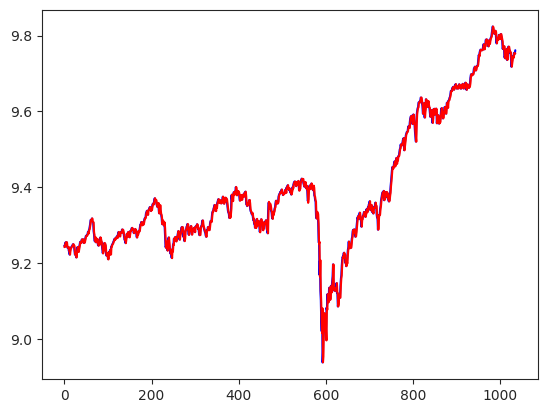

In [70]:
from matplotlib import pyplot
# plot
pyplot.plot(test, color = 'blue', label='test')
pyplot.plot(predictions, color='red', label='pred')
pyplot.show()

In [71]:
from math import sqrt
rms = sqrt(mean_squared_error(np.exp(test), np.exp(predictions)))
print('Mean Squarred Error: %.2f'% rms)

Mean Squarred Error: 137.40


In [72]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.4 MB/s eta 0:00:00


In [73]:
from pmdarima.arima import auto_arima

arima_model = auto_arima(train, start_p=1, start_q=1, d=1, max_p=4, max_q=4, start_P=1,
                         D=None, start_Q=1, max_P=4, max_D=1, max_Q=4, max_order=5, m=1,
                         seasonal=True, stationary=False, information_criterion='aic',
                         alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True,
                         n_jobs=1, start_params=None, trend=None, method='lbfgs',
                         maxiter=50, offset_test_args=None, seasonal_test_args=None,
                         suppress_warnings=True, error_action='trace', trace=False,
                         random=False, random_state=None, n_fits=10,
                         return_valid_fits=False, out_of_sample_size=0,
                         scoring='mse', scoring_args=None, with_intercept='auto',
                         sarimax_kwargs=None)

arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2071
Model:               SARIMAX(1, 1, 0)   Log Likelihood                6512.044
Date:                Tue, 20 Jun 2023   AIC                         -13018.088
Time:                        09:47:23   BIC                         -13001.182
Sample:                             0   HQIC                        -13011.891
                               - 2071                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0004      0.000      1.683      0.092   -6.39e-05       0.001
ar.L1          0.0602      0.020      3.021      0.003       0.021       0.099
sigma2         0.0001   2.39e-06     45.415      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               382.98
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
prediction_arima_model = pd.DataFrame(arima_model.predict(n_periods=len(test)))
prediction_arima_model.columns = ['Close']

np.exp(prediction_arima_model)

,Close
0,10325.804961
1,10329.974301
2,10334.230412
3,10338.493397
4,10342.758449
...,...
1030,15791.444189
1031,15797.958836
1032,15804.476171
1033,15810.996195


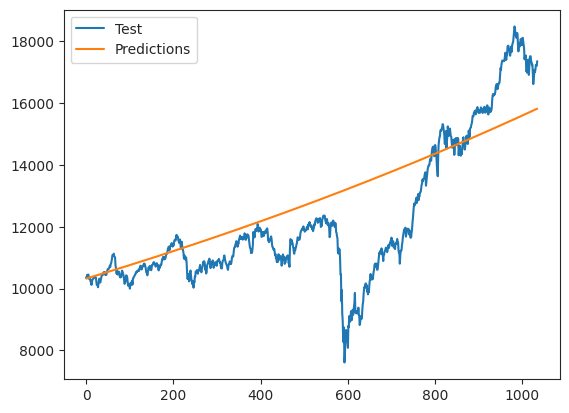

In [76]:
import matplotlib.pyplot as plt

# Your code here

plt.plot(np.exp(test), label='Test')
plt.plot(np.exp(prediction_arima_model), label='Predictions')
plt.legend(loc='upper left')  # Update the loc value here
plt.show()
